In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('C:\\Users\\Manar\\anaconda4\\cardata.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

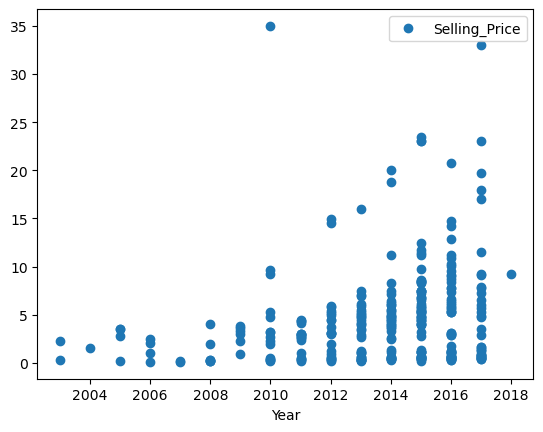

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

df.plot(x='Year',y='Selling_Price',style='o')
plt.show()

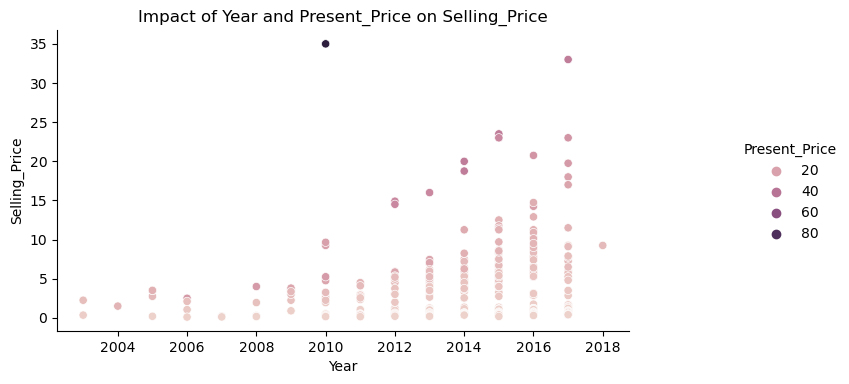

In [10]:
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline
g = sns.pairplot(data = df[['Car_Name','Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']],
             x_vars = ['Year'],y_vars = 'Selling_Price',aspect=1.5 ,hue='Present_Price'
            )
g.fig.set_size_inches(9,4)

plt.title('Impact of Year and Present_Price on Selling_Price')
plt.show()

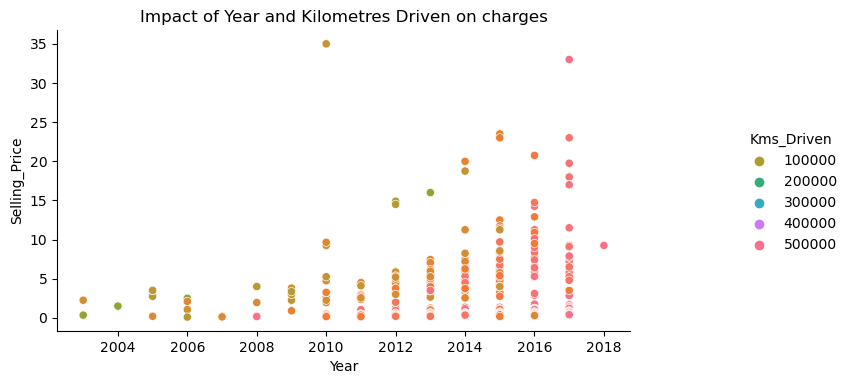

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline
g = sns.pairplot(data = df[['Car_Name','Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']],
             x_vars = ['Year'],y_vars = 'Selling_Price',aspect=1.5 ,hue='Kms_Driven',palette='husl'
            )
g.fig.set_size_inches(9,4)

plt.title('Impact of Year and Kilometres Driven on charges')
plt.show()


In [18]:
df['PPoKD'] = df['Present_Price'] * df['Kms_Driven']
print("Number of cars which are based on Present Price and Kms Driven:",df[df.PPoKD== 1].shape[0])
print("Total number of cars:",df.shape[0])

Number of cars which are based on Present Price and Kms Driven: 0
Total number of cars: 301


In [19]:
X=df[['Year','Present_Price','Kms_Driven','PPoKD']]
Y=df['Selling_Price']

In [20]:
from sklearn import linear_model

In [21]:
lr = linear_model.LinearRegression()
lr.fit(X,Y)
coeffs = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeffs

,Coefficient
Year,0.323358
Present_Price,0.790865
Kms_Driven,0.000012
PPoKD,-0.000004


In [22]:
predictions = lr.predict(X)
Prices = pd.DataFrame({'Actual':Y,'Predictions':predictions})
Prices.sample(10)

,Actual,Predictions
10,2.85,3.629637
196,0.17,3.304727
265,6.50,7.127261
44,1.25,1.329032
163,0.45,-0.502254
200,0.10,-1.341557
209,4.85,4.386014
254,5.25,5.652892
19,2.65,3.905854
132,0.75,1.569629


In [23]:
from sklearn import metrics
import numpy as np

print('Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y,predictions)))
print('Average Cost:',Y.mean())

Mean Squared Error: 1.452254813333311
Average Cost: 4.661295681063123
